In [92]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [57]:
data = pd.read_csv('cleaned_complete.csv')

In [70]:
data = data[['year','month','bathrooms', 'bedrooms', 'carspaces','postcode','rent',
       'distance of the closest bus stop','count of bus stop', 
       'count of tram stop', 
       'count of vline stop', 
       'count of school', 'count of hospital',
        'count of shopping mall',
       'bench', 'cafe', 'childcare', 'fast_food', 'kindergarten', 'parking',
       'restaurant', 'place_of_worship', 'school', 'university', 'garden',
       'park', 'playground', 'pitch', 'offence count', 'incidents recorded']]

In [71]:
postcode = list(data['postcode'].drop_duplicates())

In [72]:
# split all data by postcode
for i in postcode:
    split_data  = data[data['postcode'] == i]
    split_data.to_csv('split data/./%s.csv'%(i))

In [73]:
features = data.drop('rent',axis=1)
target = data['rent']

In [74]:

X_full, y_full = features,target
n_samples = X_full.shape[0]
n_features = X_full.shape[1] 
print(n_samples)
print(n_features)
 

rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features *missing_rate))

 
X_missing_reg = X_full.copy()

missing = X_missing_reg .isna().sum()
missing = pd.DataFrame(data={'特征': missing.index,'缺失值个数':missing.values})

missing = missing[~missing['缺失值个数'].isin([0])]

missing['缺失比例'] =  missing['缺失值个数']/X_missing_reg .shape[0]
X_df = X_missing_reg.isnull().sum()

colname = X_df[~X_df.isin([0])].sort_values().index.values

sortindex = []
for i in colname:
    sortindex.append(X_missing_reg.columns.tolist().index(str(i)))

for i in sortindex:
   
    df = X_missing_reg 
    fillc = df.iloc[:, i]  
   
    df = pd.concat([df.drop(df.columns[i], axis=1), pd.DataFrame(y_full)], axis=1)
   
    df_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df)
 
    Ytrain = fillc[fillc.notnull()]  
    Ytest = fillc[fillc.isnull()]  
   
    Xtrain = df_0[Ytrain.index, :]
    Xtest = df_0[Ytest.index, :]  
    rfc = RandomForestRegressor(n_estimators=100)  
    rfc = rfc.fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest)  
    
    X_missing_reg.loc[X_missing_reg.iloc[:, i].isnull(), X_missing_reg.columns[i]] = Ypredict


100639
29


In [78]:
new_data = X_missing_reg

In [80]:
X = new_data
y = data['rent']

In [82]:
X_length = X.shape[0]
split = int(X_length * 0.8)
X_train,X_test = X[:split].astype('int'),X[split:].astype('int')
y_train,y_test = y[:split].astype('int'),y[split:].astype('int')

In [86]:
model1 = RandomForestClassifier(max_depth=20,n_estimators=20,min_samples_leaf=10,random_state=123)
model1.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=20,
                       random_state=123)

In [88]:
model1.feature_importances_

array([1.34167428e-01, 2.39513527e-01, 4.94637593e-02, 9.83838693e-02,
       6.99931327e-02, 3.37131719e-02, 7.41952579e-05, 3.72192935e-02,
       2.31264980e-02, 6.94419035e-03, 2.18598575e-02, 1.18052590e-02,
       8.98794665e-03, 1.76766669e-02, 1.82827559e-02, 7.19664441e-03,
       1.57056329e-02, 1.12895601e-02, 1.97255354e-02, 1.73330086e-02,
       1.42403207e-02, 1.73829623e-02, 4.01334478e-03, 1.39263921e-02,
       2.15101759e-02, 1.69190769e-02, 1.88494828e-02, 2.54671251e-02,
       2.52291867e-02])

7.419525785618739e-05 distance of the closest bus stop
0.00401334477704895 university
0.006944190349738026 count of vline stop
0.007196644413403281 childcare
0.008987946650844502 count of shopping mall
0.011289560060944616 kindergarten
0.01180525902935192 count of hospital
0.013926392087407277 garden
0.014240320714190314 place_of_worship
0.01570563287325556 fast_food
0.01691907689847556 playground
0.017333008628672576 restaurant
0.017382962257656988 school
0.017676666875699153 bench
0.018282755916609137 cafe
0.018849482772003736 pitch
0.01972553542257291 parking
0.021510175884993966 park
0.021859857454552118 count of school
0.023126498032503152 count of tram stop
0.025229186709564633 incidents recorded
0.025467125090750525 offence count
0.033713171875673055 postcode
0.037219293535829555 count of bus stop
0.049463759337560476 bathrooms
0.06999313273869075 carspaces
0.09838386930863256 bedrooms
0.1341674277064208 year
0.23951352733909773 month


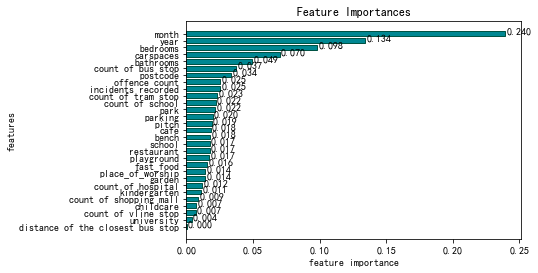

In [94]:
features_import = DataFrame(new_data.columns, columns=['feature'])
features_import['importance'] = model1.feature_importances_  
features_import.sort_values('importance', inplace=True)

from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  

plt.barh(features_import['feature'], features_import['importance'], height=0.7, color='#008792', edgecolor='#005344') 
plt.xlabel('feature importance')
plt.ylabel('features') 
plt.title('Feature Importances') 
for a,b in zip( features_import['importance'],features_import['feature']): 
   print(a,b)
   plt.text(a+0.001, b,'%.3f'%float(a)) 
plt.show()